In [2]:
import tables
import matplotlib.pyplot as plt
import numpy as np
import h5py

IndexError: index 10 is out of bounds for axis 0 with size 10

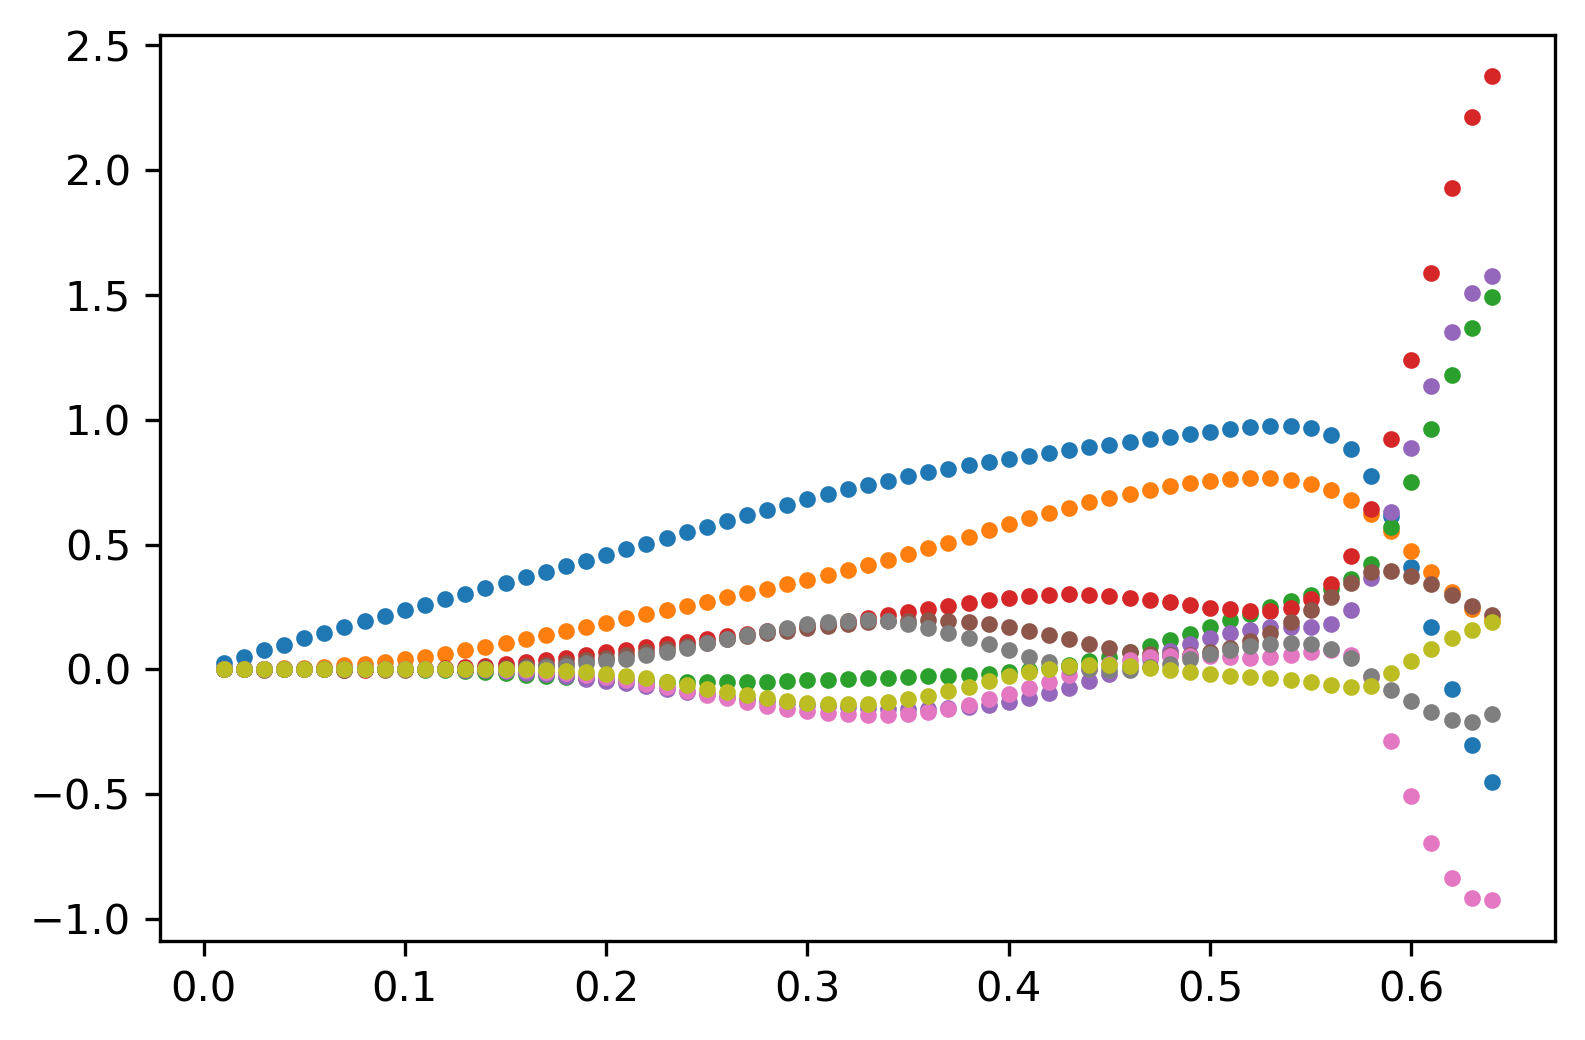

In [47]:
def LoadDataPE_TW(path, radius, order):
    data = []
    filename = path + 'file_' + radius + '.h5'
    h = tables.open_file(filename,'r')
    coeff = 'coeff' + str(order)
    hess = 'hess' + str(order)
    data = eval('np.array(h.root.'+ coeff + '[:])')
    h.close()
    return data

def main_photon(path, order):
    ra = np.arange(0.01, 0.65, 0.01)
    rd = []
    coeff_pe = []
    for radius in ra:
        str_radius = '%+.3f' % radius
        coeff= LoadDataPE_TW(path, str_radius, order)
        rd.append(np.array(radius))
        coeff_pe = np.hstack((coeff_pe, coeff)) 
    coeff_pe = np.reshape(coeff_pe,(-1,np.size(rd)),order='F')
    return rd, coeff_pe

order = 10
rd, coeff_pe = main_photon('coeff_pe_1t_8.0MeV_shell/',order)
plt.figure(dpi=300)
for i in np.arange(order):
    plt.plot(rd, coeff_pe[i+1],'.',label='%d-th coefficient' % i)
plt.legend()
plt.xlabel('Radius/m')
plt.ylabel('PE Legendre Coefficient')
plt.savefig('Recon.png')
plt.show()

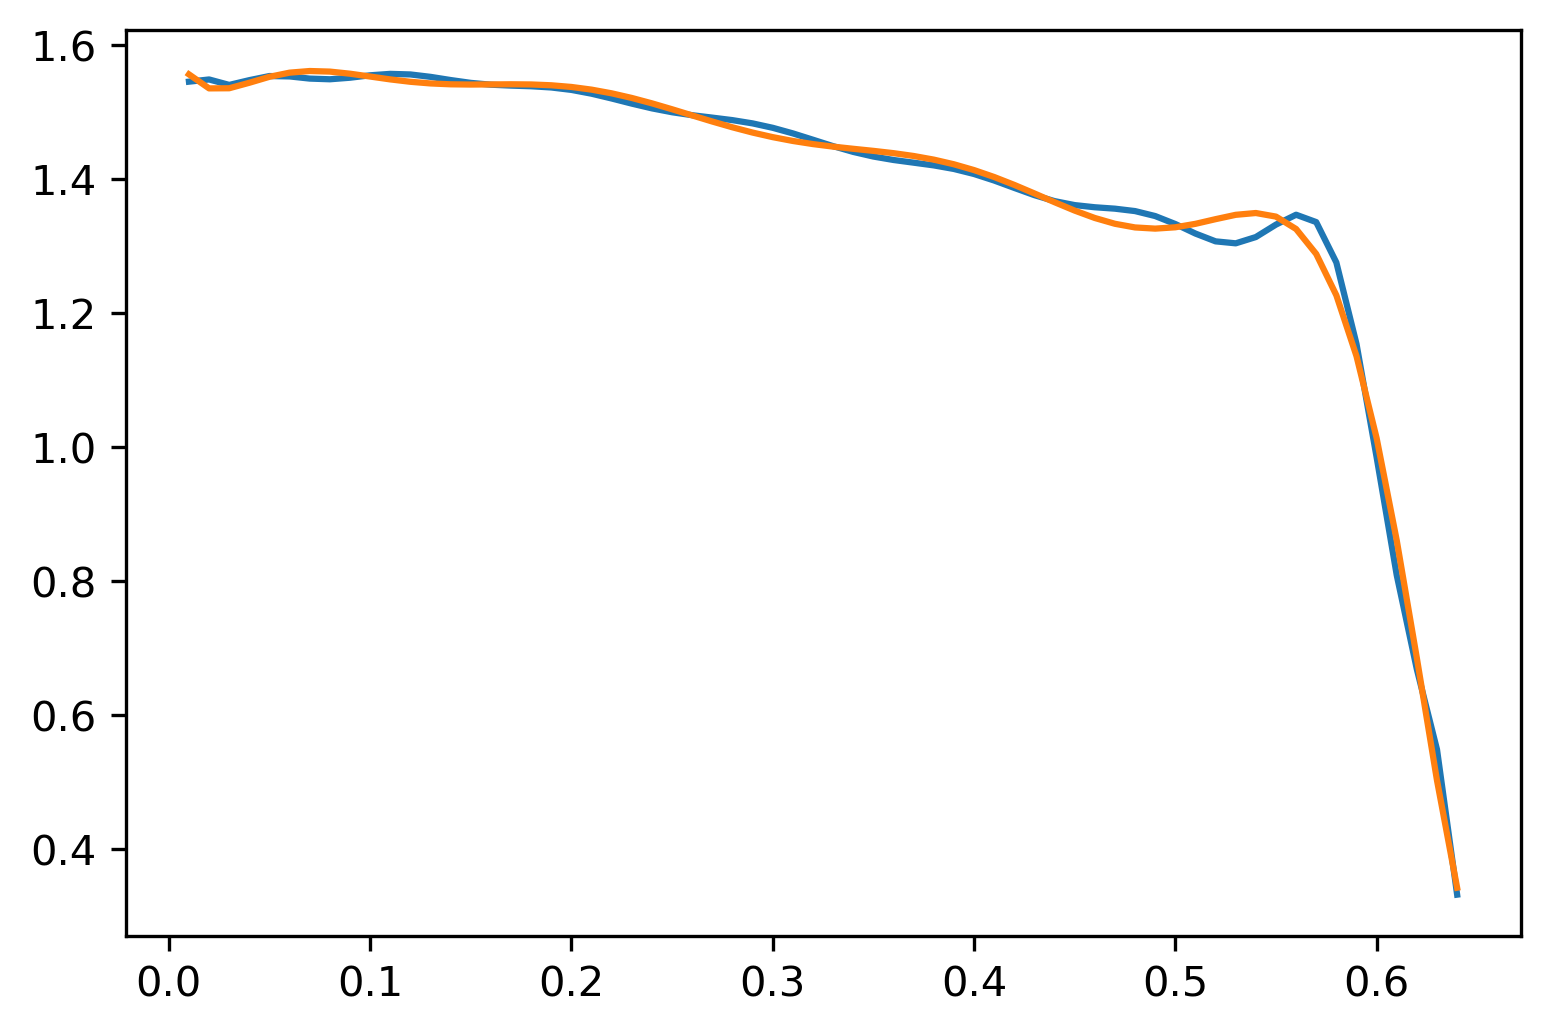

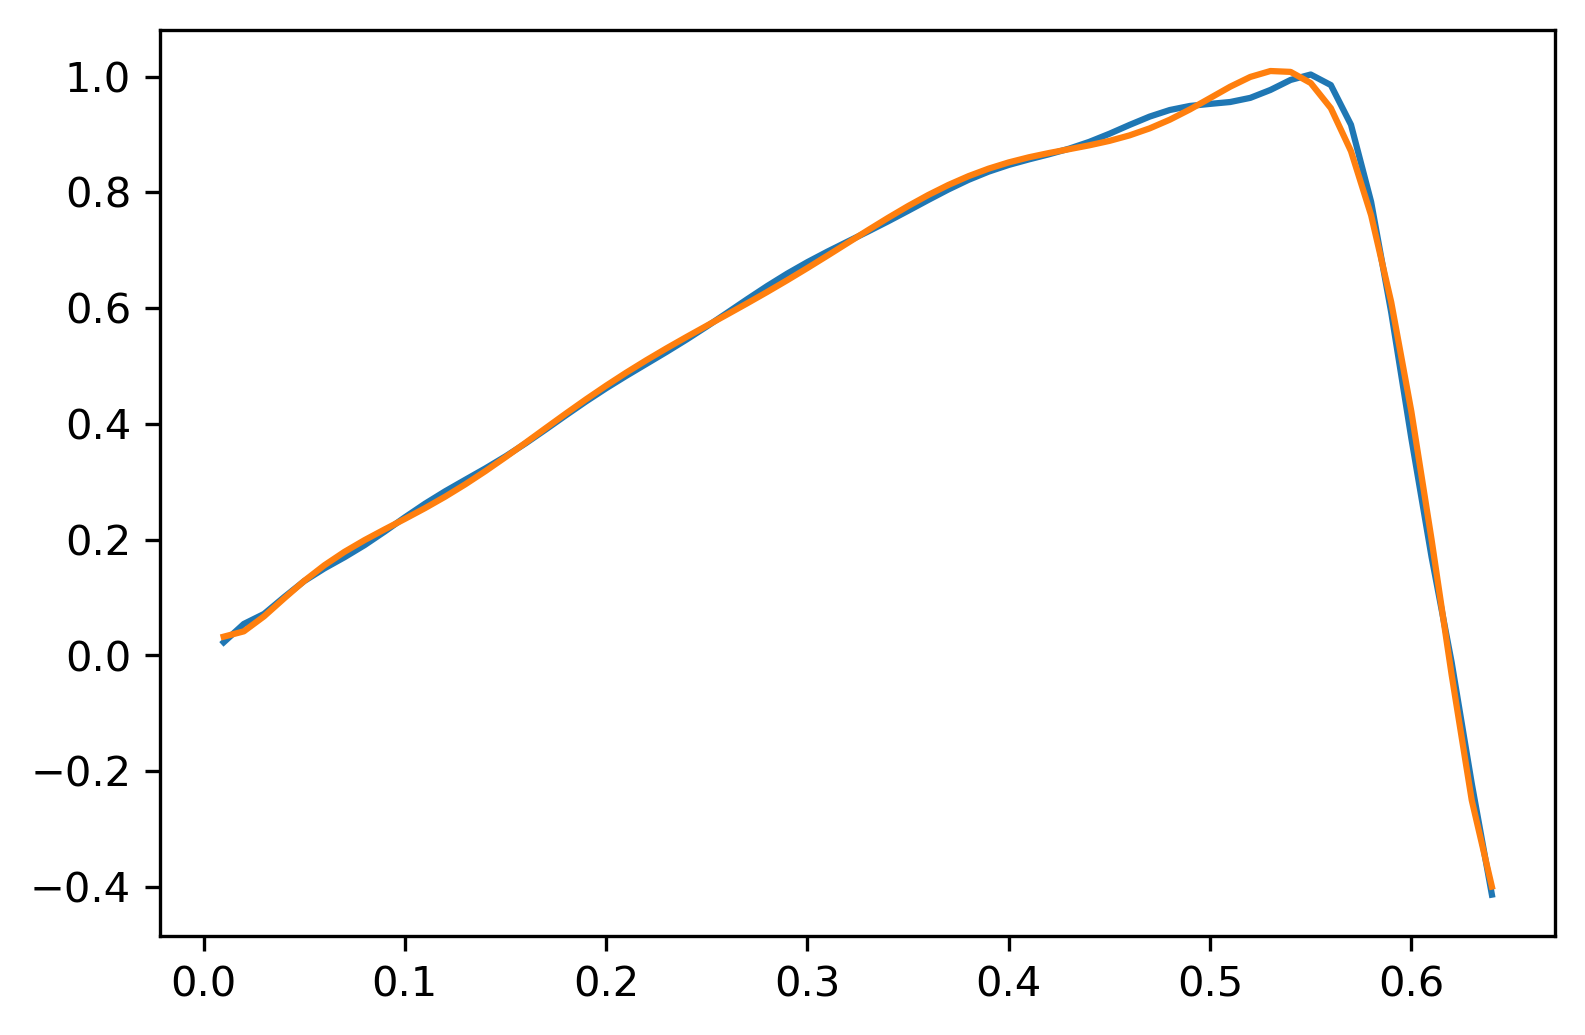

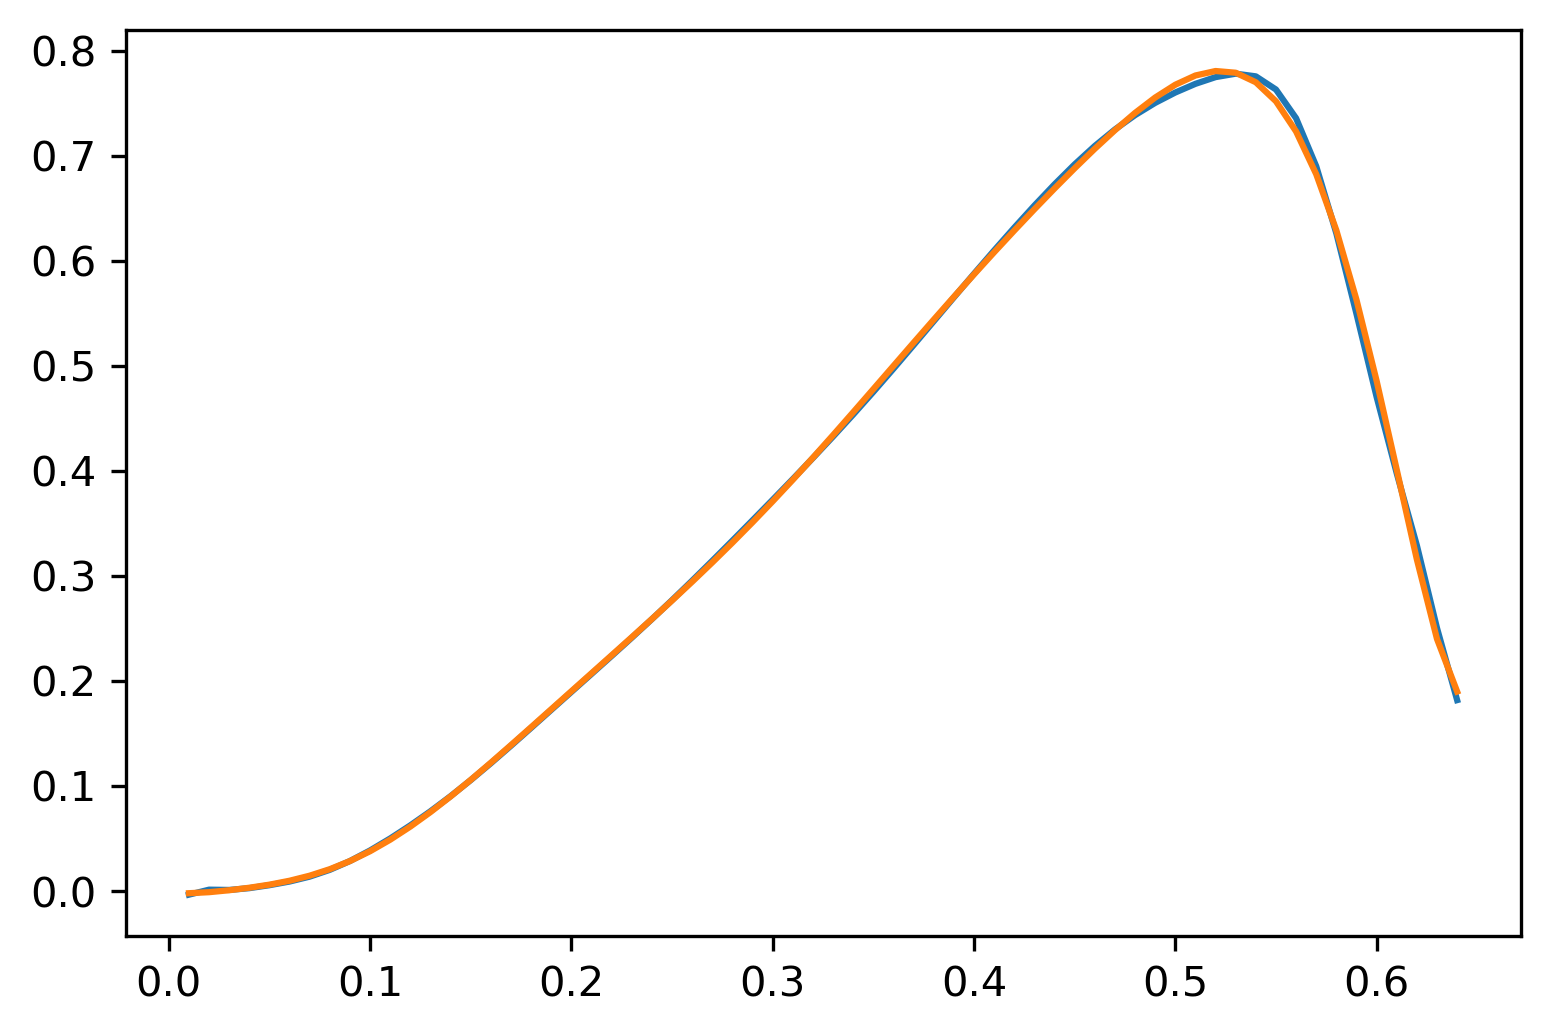

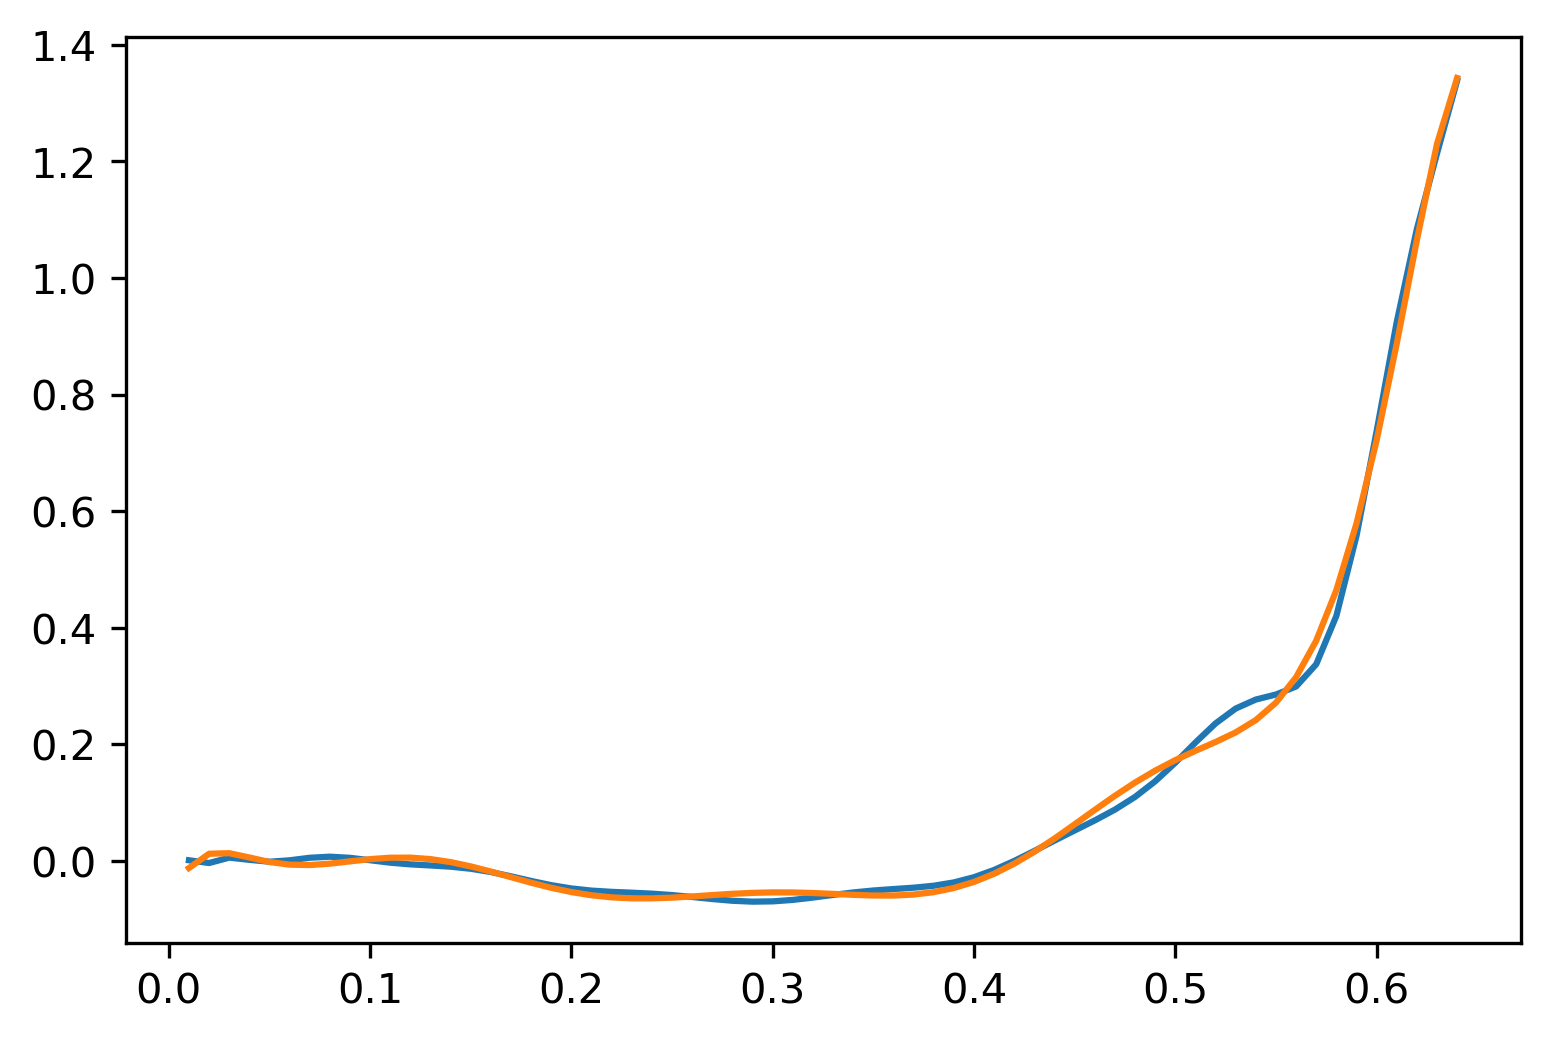

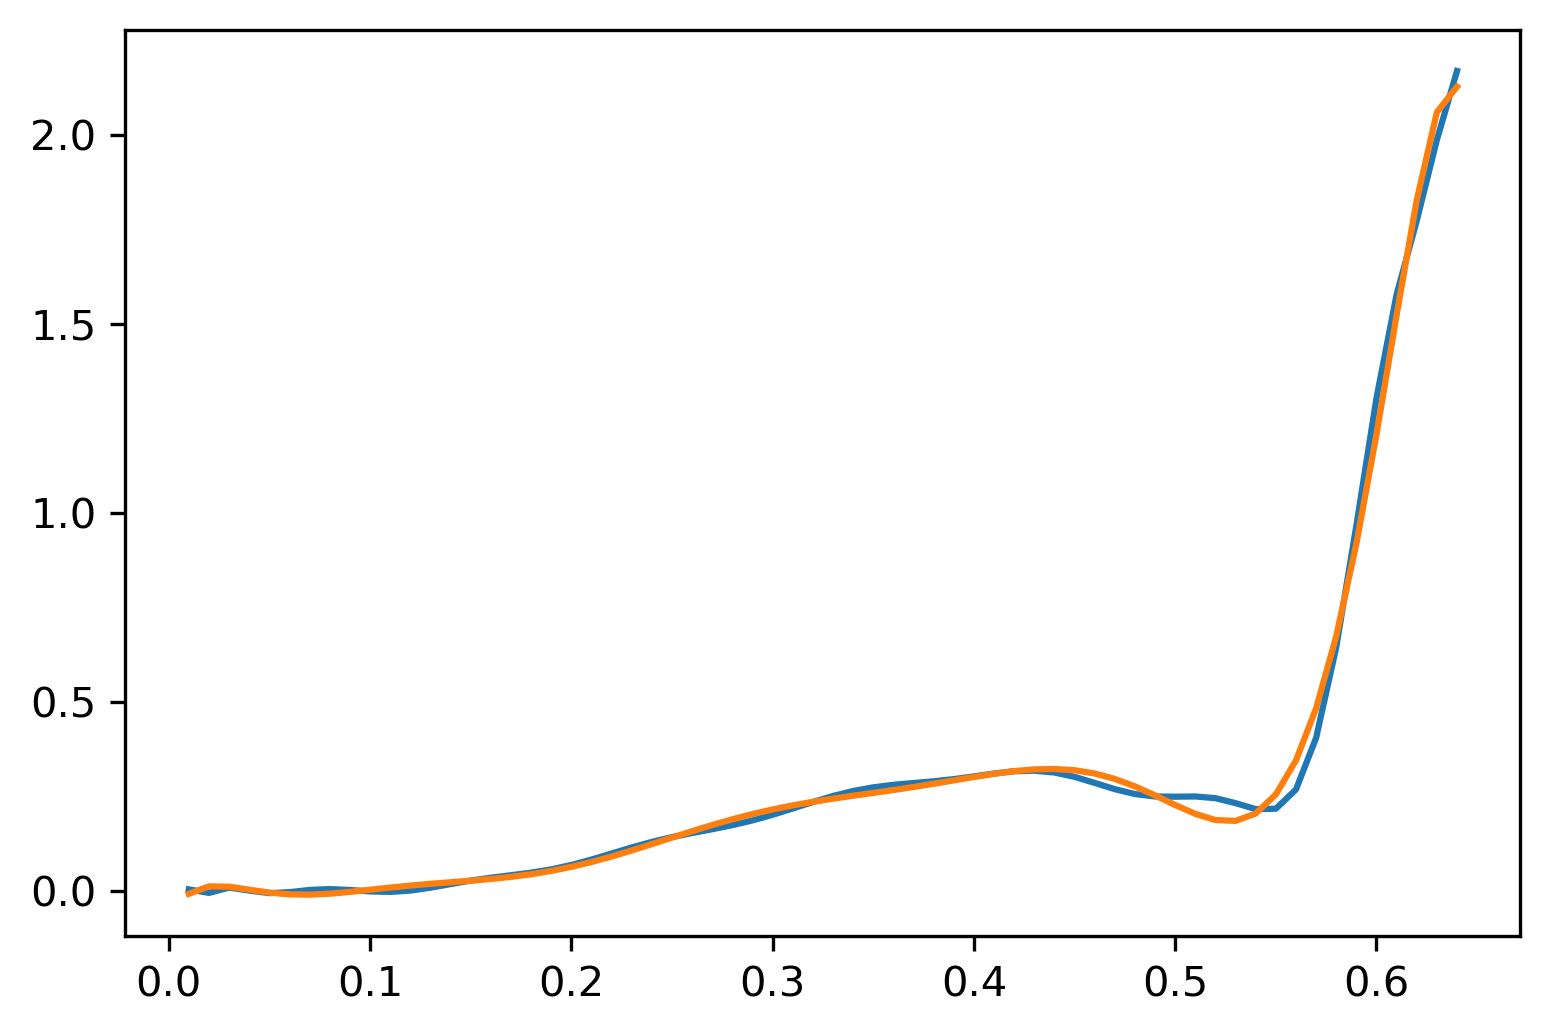

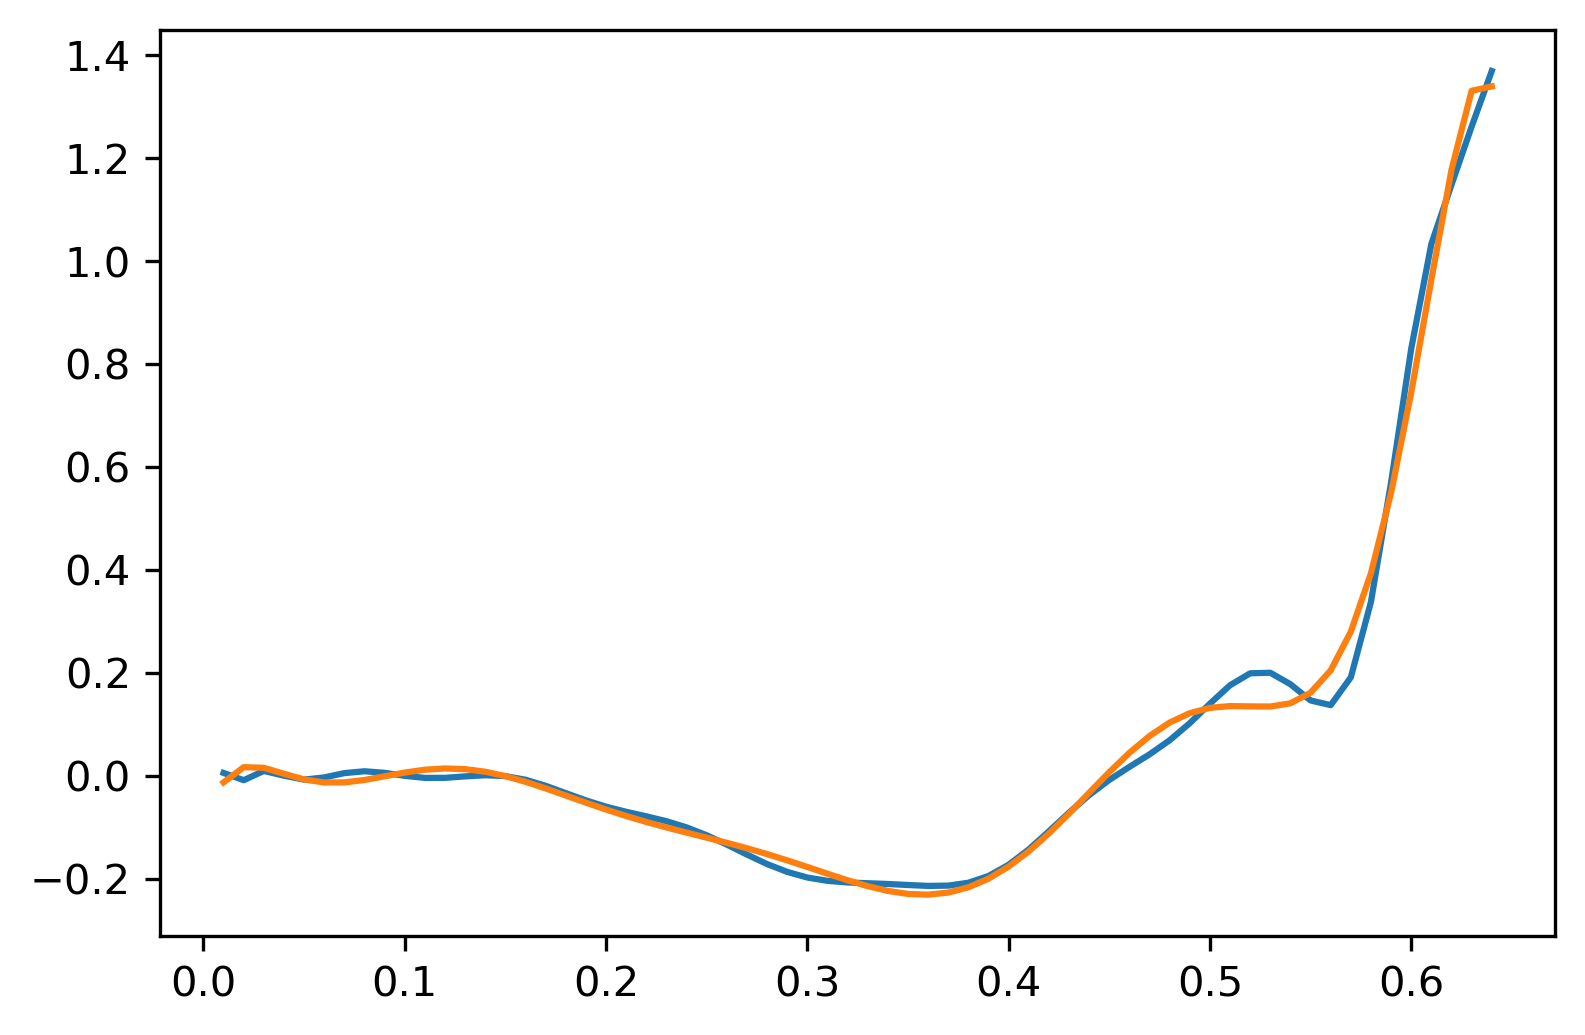

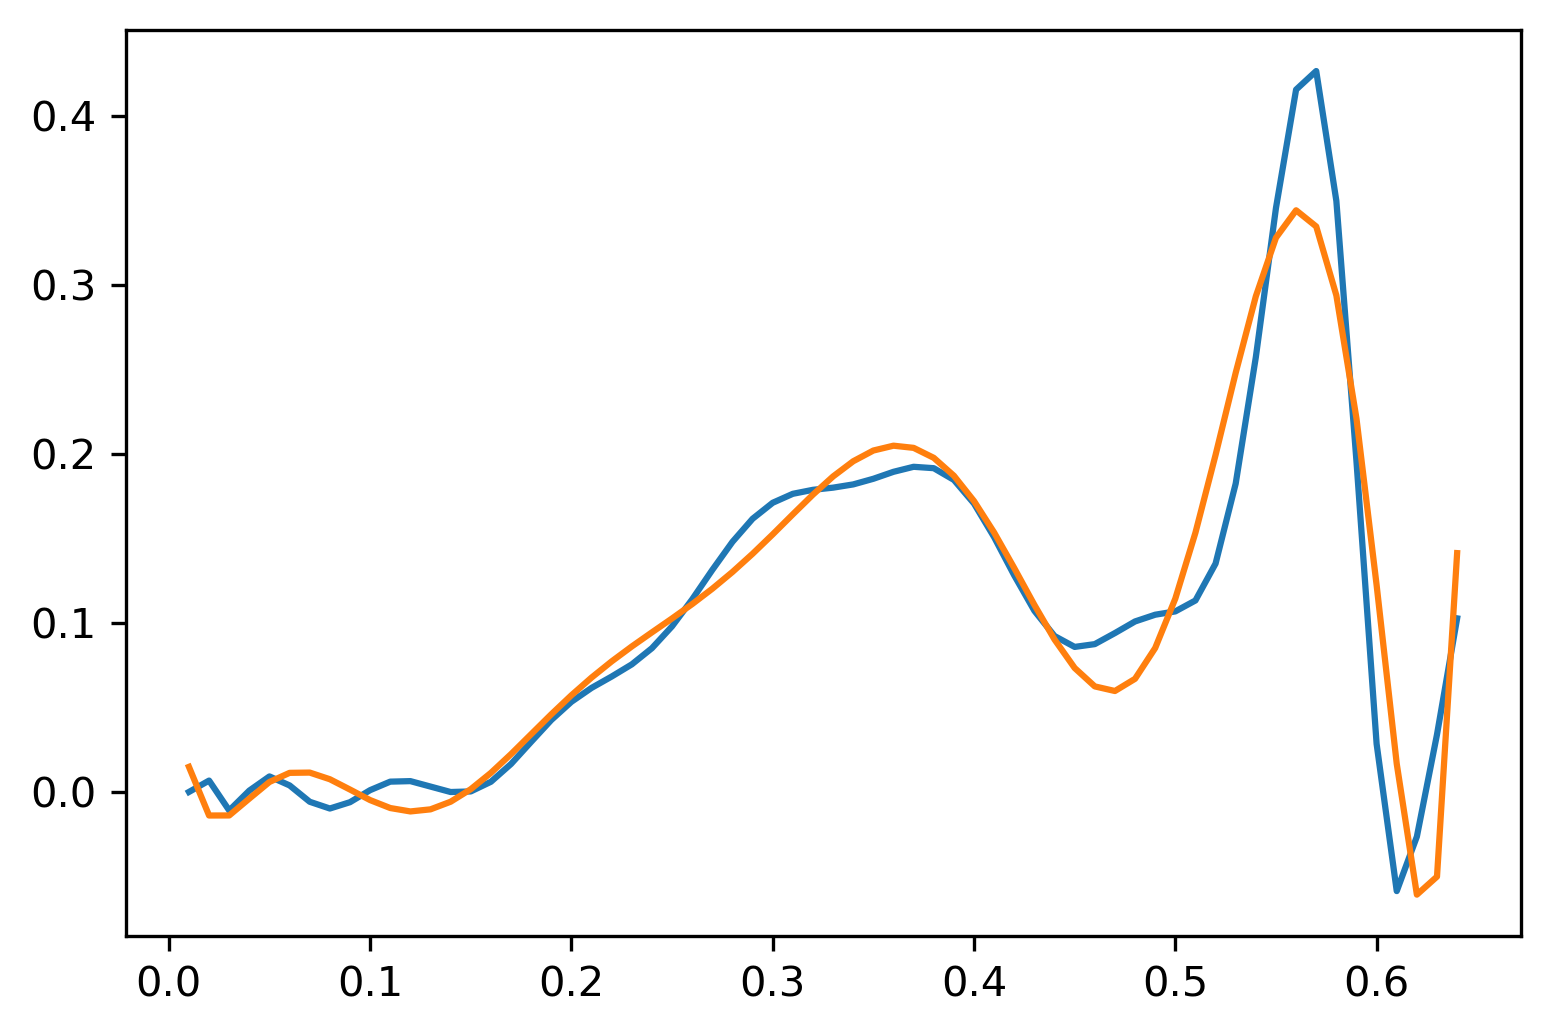

In [4]:
for i in np.arange(7):
    B, tmp = np.polynomial.legendre.legfit(rd/np.max(rd), coeff_pe[i+1], deg=20, full=True)
    y1 = np.polynomial.legendre.legval(rd/np.max(rd), B)
    
    C = np.polyfit(rd/np.max(rd), coeff_pe[i+1], deg=10)
    y2 = np.polyval(C, rd/np.max(rd))
    plt.figure(num = i+1, dpi = 300)
    plt.plot(rd,y1)
    plt.plot(rd,y2)
    plt.show()
#A = np.polynomial.legendre.Legendre.fit(np.array((-0.5,0.4)), np.array((0.5,0.6)),deg=5)

[-6.67466507e-03 -6.21725069e-03 -5.66964876e-03 -5.02455474e-03
 -4.27433071e-03 -3.41099864e-03 -2.42623365e-03 -1.31135732e-03
 -5.73308941e-05]
[0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55 0.56]
17
0


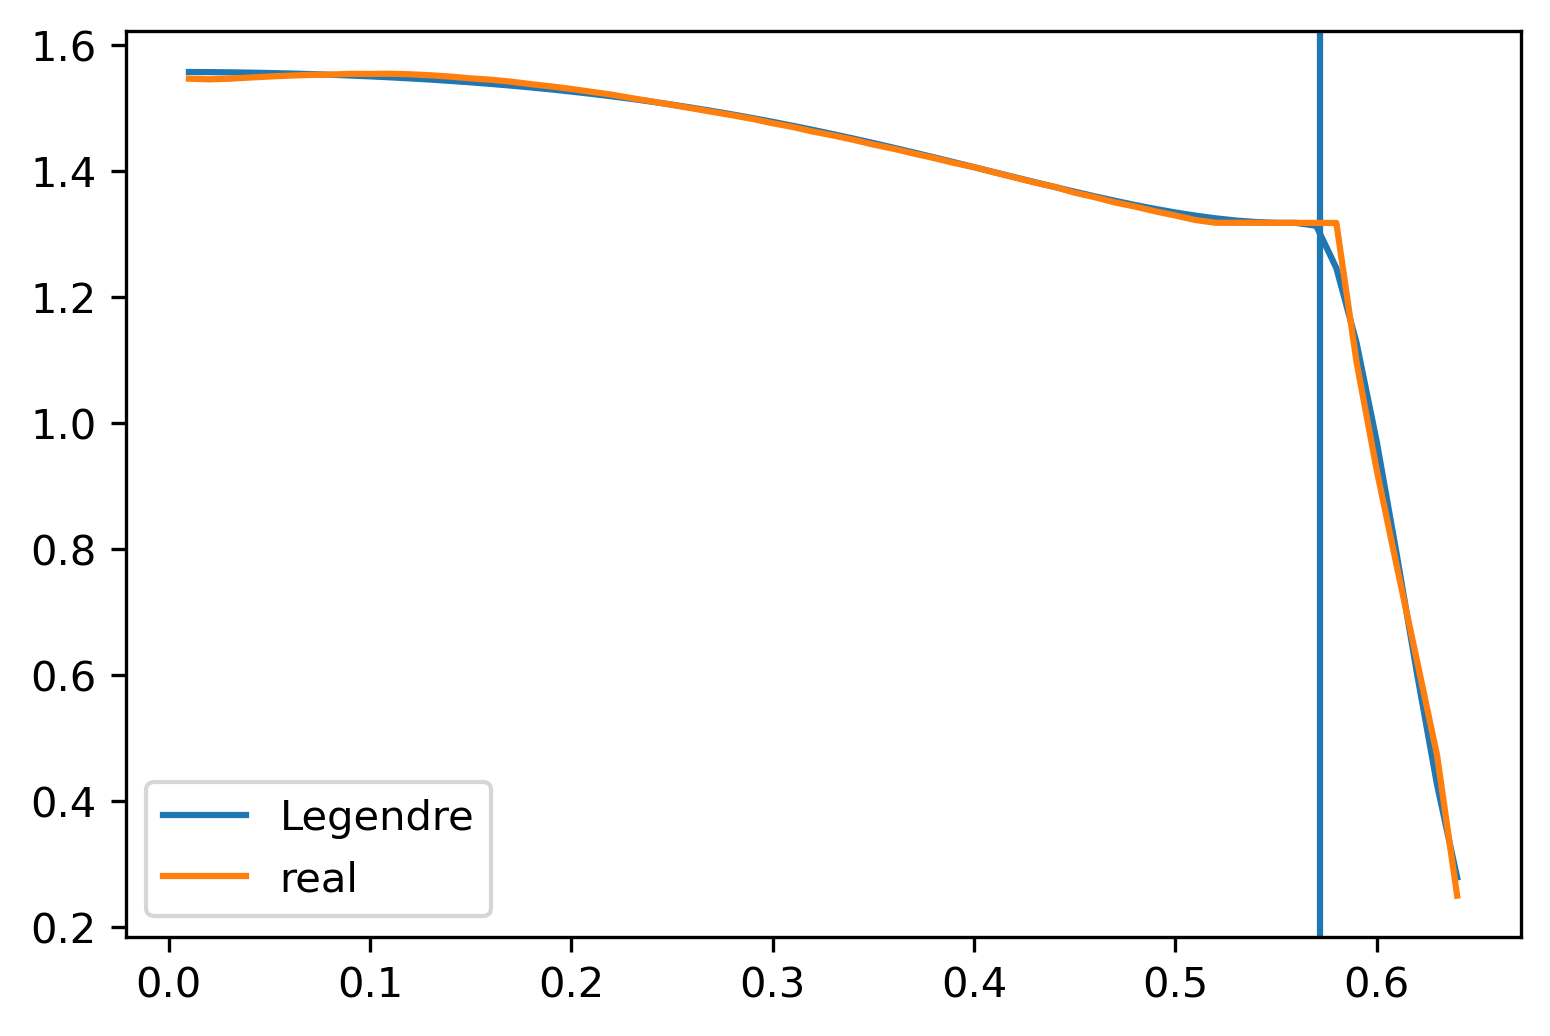

[ 0.01250861  0.01172869  0.01068691  0.00930788  0.00750314  0.00516961
  0.0021881  -0.00157842 -0.00628662]
[0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55 0.56]
10
7


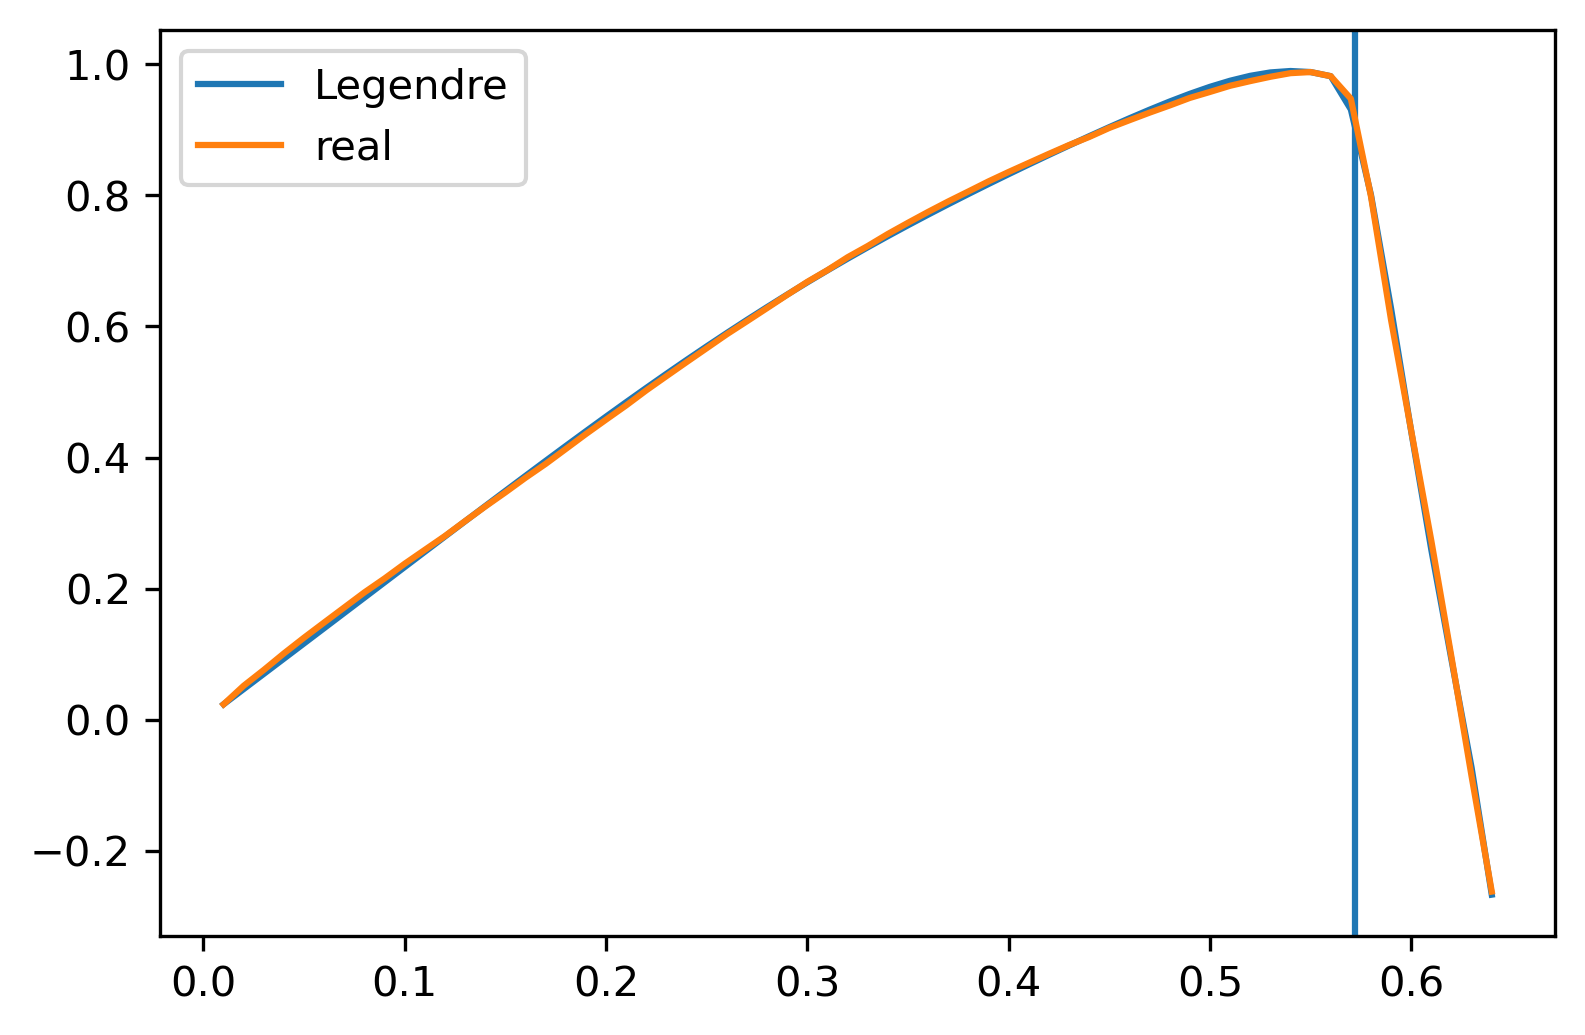

[ 0.01053536  0.00862352  0.00653149  0.00425071  0.00177235 -0.00091273
 -0.00381399 -0.00694118 -0.0103044 ]
[0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55 0.56]
12
5


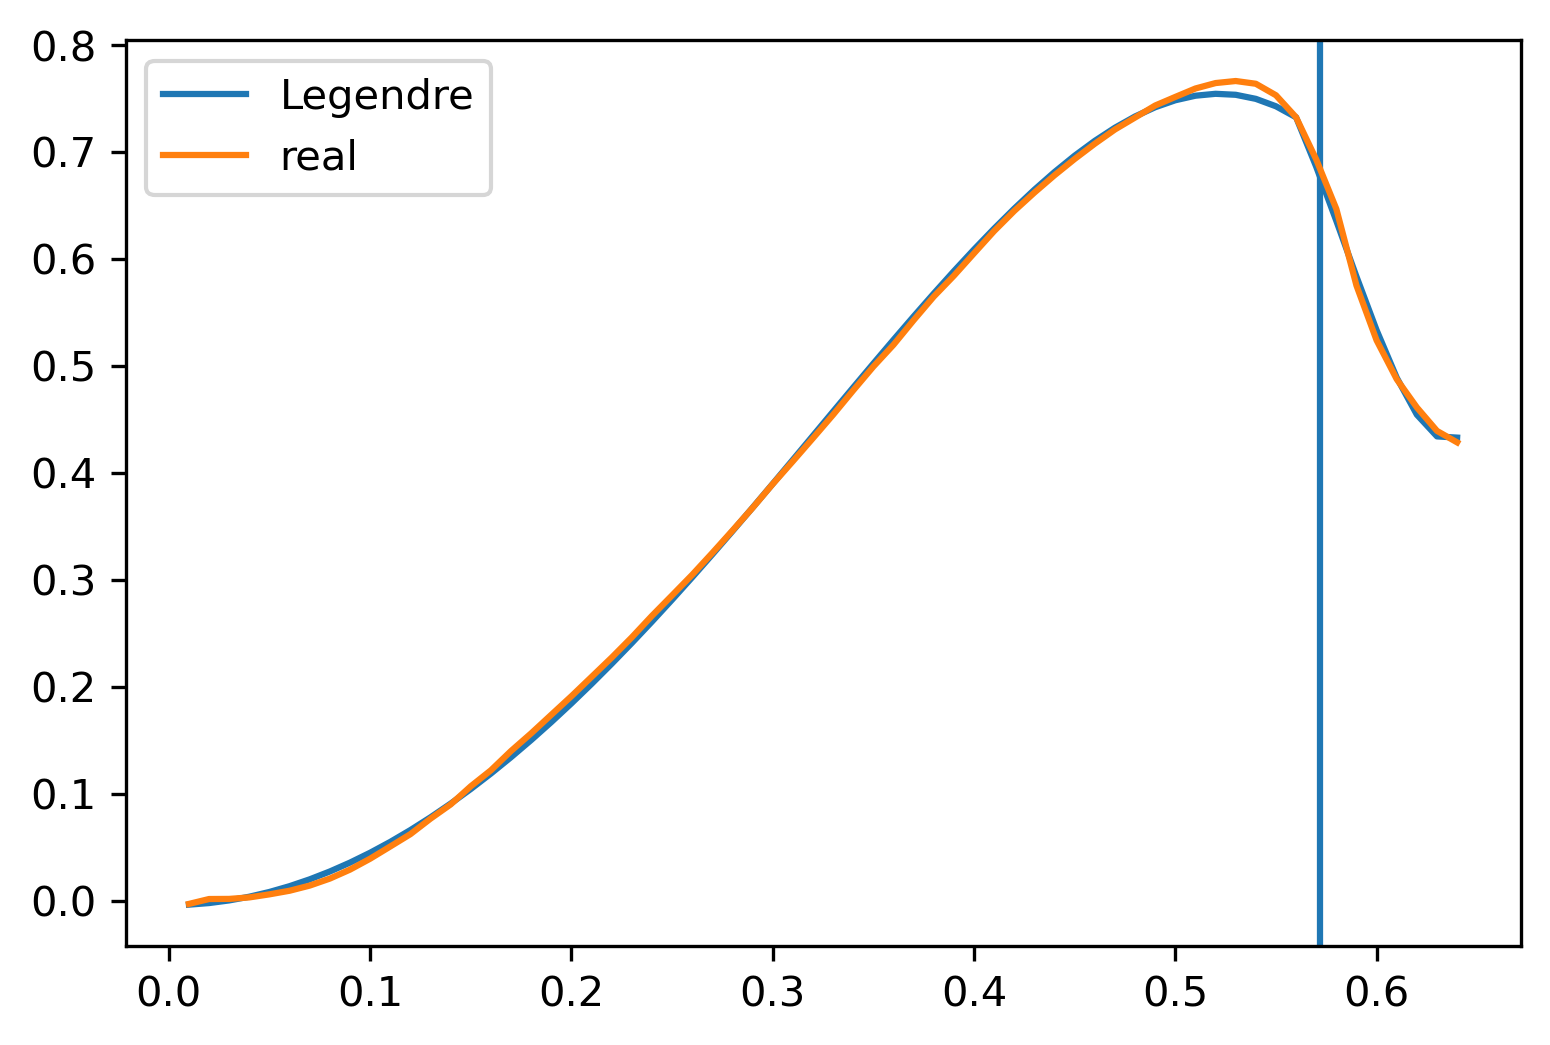

[0.02989425 0.03116576 0.03198873 0.03225778 0.03185493 0.03064861
 0.02849252 0.02522458 0.02066567]
[0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55 0.56]
0
17


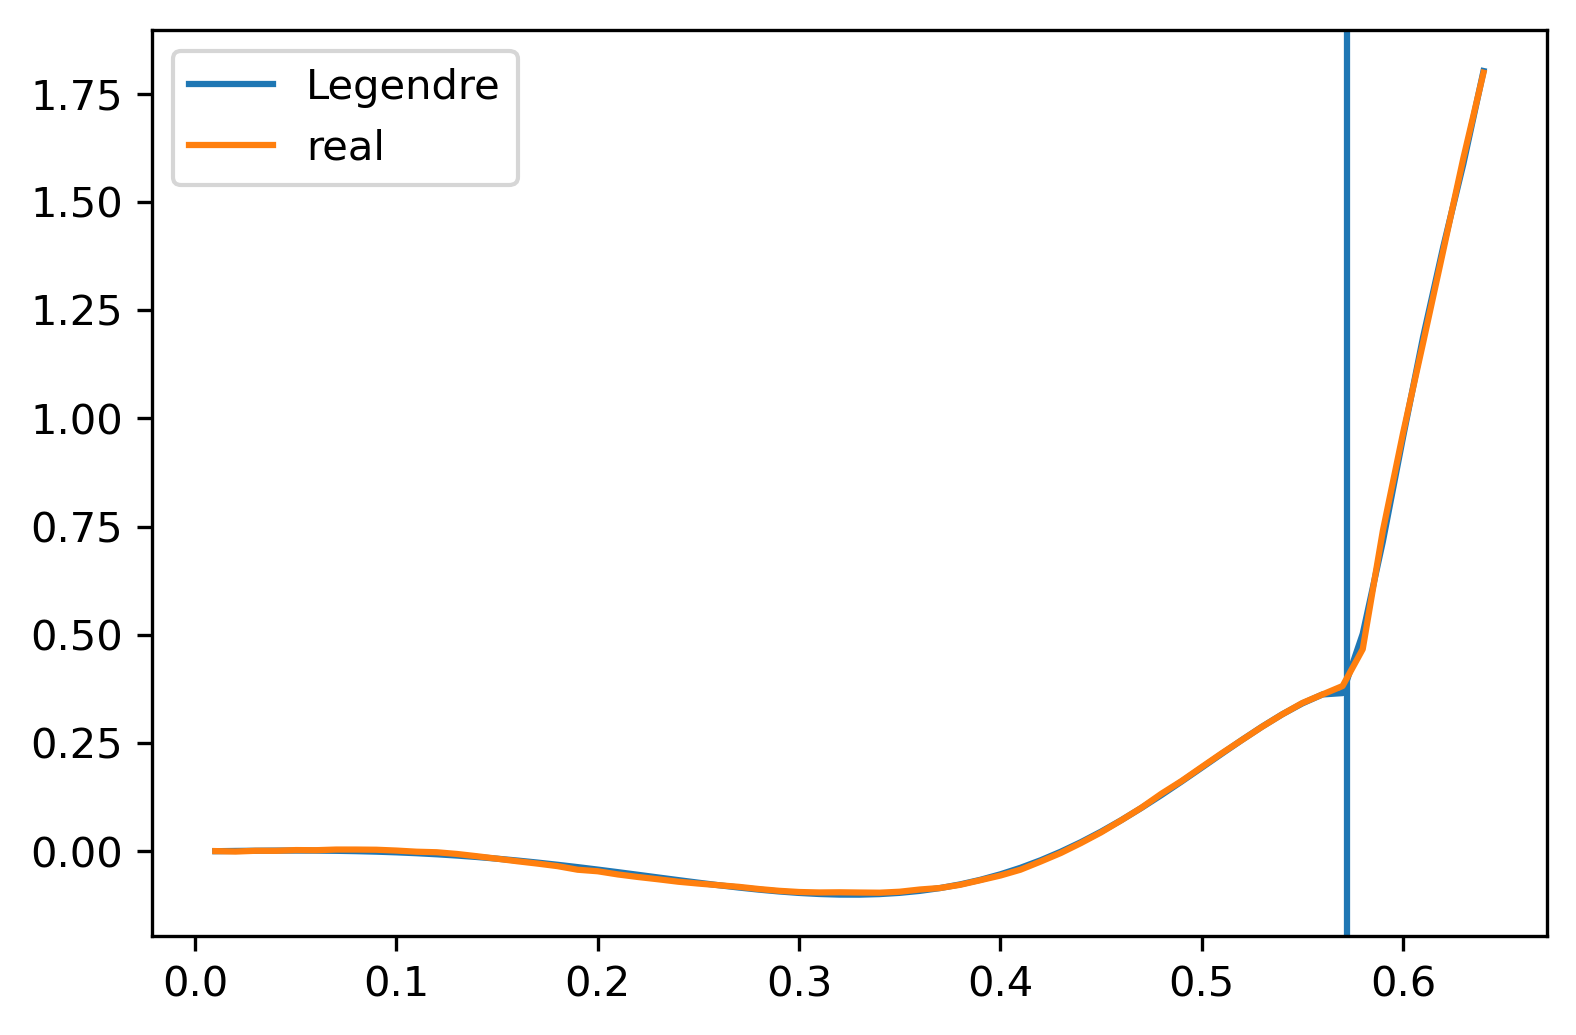

[0.01327123 0.01470987 0.01639577 0.01835208 0.02060299 0.02317388
 0.02609124 0.02938273 0.03307721]
[0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55 0.56]
0
17


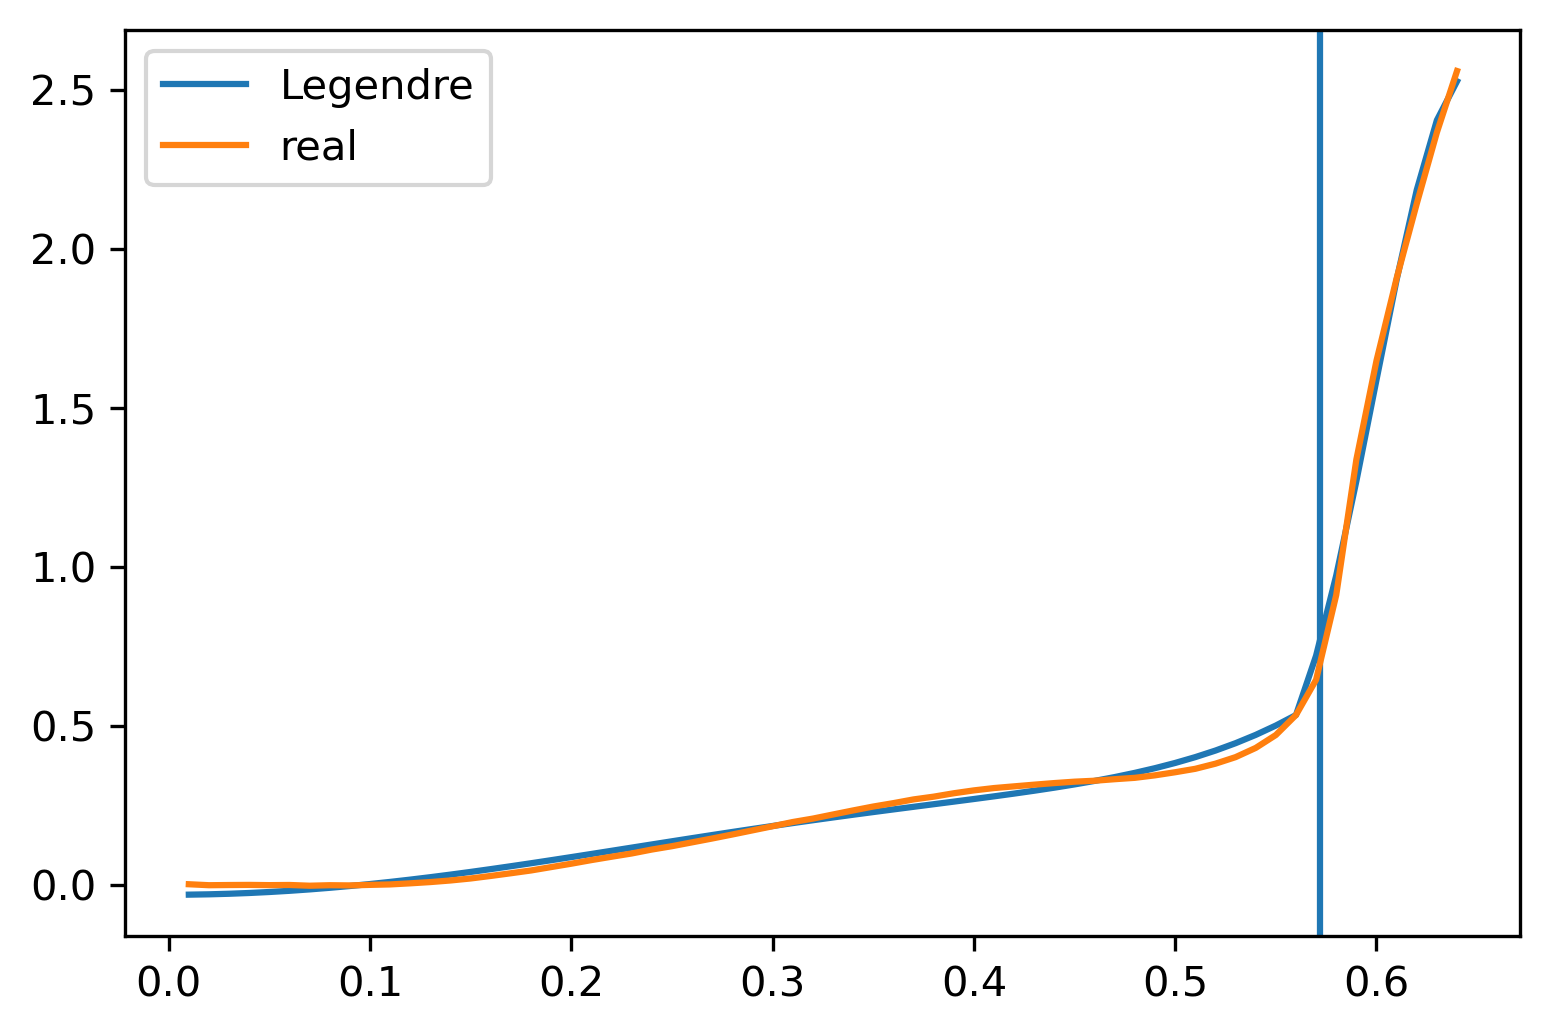

In [34]:
def LoadDataPE_TW(path, radius, order):
    data = []
    filename = path + 'file_' + radius + '.h5'
    h = tables.open_file(filename,'r')
    coeff = 'coeff' + str(order)
    hess = 'hess' + str(order)
    data = eval('np.array(h.root.'+ coeff + '[:])')
    h.close()
    return data

def main_photon(path, order):
    ra = np.arange(0.01, 0.65, 0.01)
    rd = []
    coeff_pe = []
    for radius in ra:
        str_radius = '%+.3f' % radius
        coeff= LoadDataPE_TW(path, str_radius, order)
        rd.append(np.array(radius))
        coeff_pe = np.hstack((coeff_pe, coeff)) 
    coeff_pe = np.reshape(coeff_pe,(-1,np.size(rd)),order='F')
    return rd, coeff_pe

order = 5
fit_order = 10
rd, coeff_pe = main_photon('coeff_pe_1t_shell_200000/',order)
rd = np.array(rd)
coeff_pe = np.array(coeff_pe)
#coeff_pe[1][55] = (coeff_pe[1][54] + coeff_pe[1][57])/2 + (coeff_pe[1][54] - coeff_pe[1][57])*1/3 
#coeff_pe[1][56] = (coeff_pe[1][54] + coeff_pe[1][57])/2 + (coeff_pe[1][54] - coeff_pe[1][57])*1/3 
coeff_pe[1][51:58] = np.interp(rd[51:58],np.array((rd[51], rd[57])), np.array((coeff_pe[1][51],coeff_pe[1][57])))
_fit_coeff = np.zeros((order, fit_order))

bd = 0.88
deg = 6
d = np.where(np.abs(rd-np.max(rd)*bd) == np.min(np.abs(rd-np.max(rd)*bd)))

for i in np.arange(order):
    index_in = (rd<=rd[d[0][0]])
    index_out = (rd>=rd[d[0][0]])

    if not i % 2:
        w_in = np.ones_like(rd[index_in])
        w_out = np.ones_like(rd[index_out])
        w_in[-1] = 1000
        w_out[0] = 1000
        if(i==0):
                    w_in[-1] = 1000
        # Legendre coeff

        B_in, tmp = np.polynomial.legendre.legfit(np.hstack((rd[index_in]/np.max(rd),-rd[index_in]/np.max(rd))), \
                                                  np.hstack((coeff_pe[i+1,index_in], coeff_pe[i+1,index_in])), \
                                                  deg = deg, w = np.hstack((w_in,w_in)), full = True)

        y1_in = np.polynomial.legendre.legval(rd[index_in]/np.max(rd), B_in)
        
        B_out, tmp = np.polynomial.legendre.legfit(np.hstack((rd[index_out]/np.max(rd),-rd[index_out]/np.max(rd))), \
                                                  np.hstack((coeff_pe[i+1,index_out], coeff_pe[i+1,index_out])), \
                                                  deg = deg, w = np.hstack((w_out,w_out)), full = True)
        y1_out = np.polynomial.legendre.legval(rd[index_out]/np.max(rd), B_out)
        # polynormial coeff
        C_in = np.polyfit(np.hstack((rd[index_in]/np.max(rd),-rd[index_in]/np.max(rd))), \
                          np.hstack((coeff_pe[i+1,index_in], coeff_pe[i+1,index_in])), \
                          deg=10)
        y2_in = np.polyval(C_in, rd[index_in]/np.max(rd))

        C_out = np.polyfit(np.hstack((rd[index_out]/np.max(rd),-rd[index_out]/np.max(rd))), \
                  np.hstack((coeff_pe[i+1,index_out], coeff_pe[i+1,index_out])), \
                  deg=10)
        y2_out = np.polyval(C_out, rd[index_out]/np.max(rd))

    else:
        B_in, tmp = np.polynomial.legendre.legfit(np.hstack((rd[index_in]/np.max(rd),-rd[index_in]/np.max(rd))), \
                                                  np.hstack((coeff_pe[i+1,index_in], -coeff_pe[i+1,index_in])), \
                                                  deg=10, w = np.hstack((w_in,w_in)), full=True)
        y1_in = np.polynomial.legendre.legval(rd[index_in]/np.max(rd), B_in)
        
        B_out, tmp = np.polynomial.legendre.legfit(np.hstack((rd[index_out]/np.max(rd),-rd[index_out]/np.max(rd))), \
                                                  np.hstack((coeff_pe[i+1,index_out], -coeff_pe[i+1,index_out])), \
                                                  deg=10, w = np.hstack((w_out,w_out)), full=True)
        y1_out = np.polynomial.legendre.legval(rd[index_out]/np.max(rd), B_out)
        C_in = np.polyfit(np.hstack((rd[index_in]/np.max(rd),-rd[index_in]/np.max(rd))), \
                  np.hstack((coeff_pe[i+1,index_in], coeff_pe[i+1,index_in])), \
                  deg=10)
        y2_in = np.polyval(C_in, rd[index_in]/np.max(rd))
        
        C_out = np.polyfit(np.hstack((rd[index_out]/np.max(rd),-rd[index_out]/np.max(rd))), \
                  np.hstack((coeff_pe[i+1,index_out], coeff_pe[i+1,index_out])), \
                  deg=10)
        y2_out = np.polyval(C_out, rd[index_out]/np.max(rd))
 
    plt.figure(num = i+1, dpi = 300)
    plt.plot(rd, np.hstack((y1_in, y1_out[1:])), label = 'Legendre')
    print(np.diff(y1_in[-10:]))
    print(rd[index_in][-10:])
    print(np.sum(np.diff(np.hstack((y1_in[-10:], y1_out[1:])))<=0))
    print(np.sum(np.diff(np.hstack((y1_in[-10:], y1_out[1:])))>0))
    plt.axvline(0.65*bd)
    #plt.plot(rd, np.hstack((y2_in, y2_out[1:])), label='poly')
    plt.plot(rd, coeff_pe[i+1], label='real')
    plt.legend()
    plt.show()
#A = np.polynomial.legendre.Legendre.fit(np.array((-0.5,0.4)), np.array((0.5,0.6)),deg=5)

In [6]:
np.sum(np.diff(np.hstack((y1_in, y1_out[1:])))<=0)

0

In [11]:
coeff_pe[1]

array([1.54618741, 1.54513328, 1.54609839, 1.54797101, 1.54960095,
       1.55104295, 1.55214331, 1.55258876, 1.55382192, 1.55369214,
       1.55399185, 1.55309886, 1.55156556, 1.54947007, 1.54657882,
       1.54452472, 1.54142332, 1.53744282, 1.53390461, 1.52989728,
       1.52527892, 1.5208826 , 1.51523898, 1.51005842, 1.50455795,
       1.49908332, 1.49348086, 1.48812675, 1.48225554, 1.47545632,
       1.46952739, 1.46229624, 1.4561162 , 1.44921223, 1.44164916,
       1.43500425, 1.42747345, 1.42037122, 1.41257552, 1.40579577,
       1.39751089, 1.38959359, 1.38153671, 1.37459942, 1.36534731,
       1.35815238, 1.34986049, 1.34334492, 1.33578059, 1.32918004,
       1.321985  , 1.31766598, 1.31361936, 1.31158139, 1.31235563,
       1.31850491, 1.33360419, 1.31732012, 1.09739624, 0.92602463,
       0.77304659, 0.62386909, 0.47358713, 0.25036469])

In [25]:
print(coeff_pe[1][51],coeff_pe[1][57])
np.interp(rd[51:58],np.array((rd[51], rd[57])), np.array((coeff_pe[1][51],coeff_pe[1][57])))

1.3176659813028813 1.3173201179640508


array([1.31766598, 1.31760834, 1.31755069, 1.31749305, 1.31743541,
       1.31737776, 1.31732012])

/usr/lib64/python3.6/site-packages/IPython/core/interactiveshell.py:3319: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


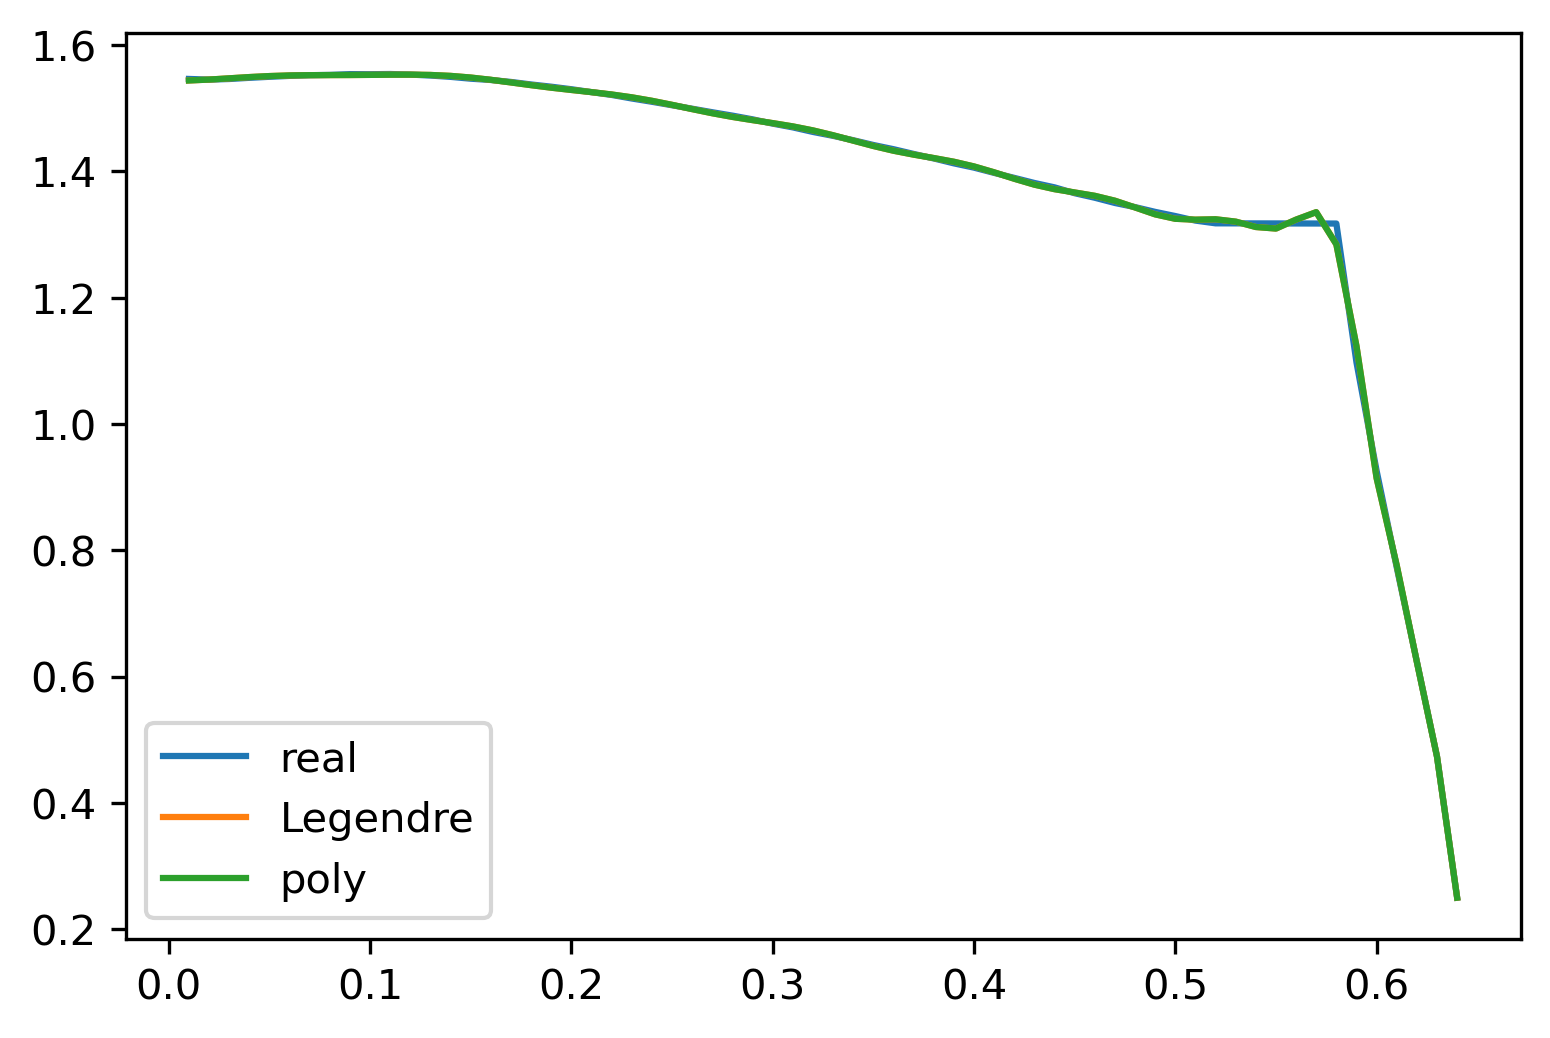

/usr/lib64/python3.6/site-packages/IPython/core/interactiveshell.py:3319: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


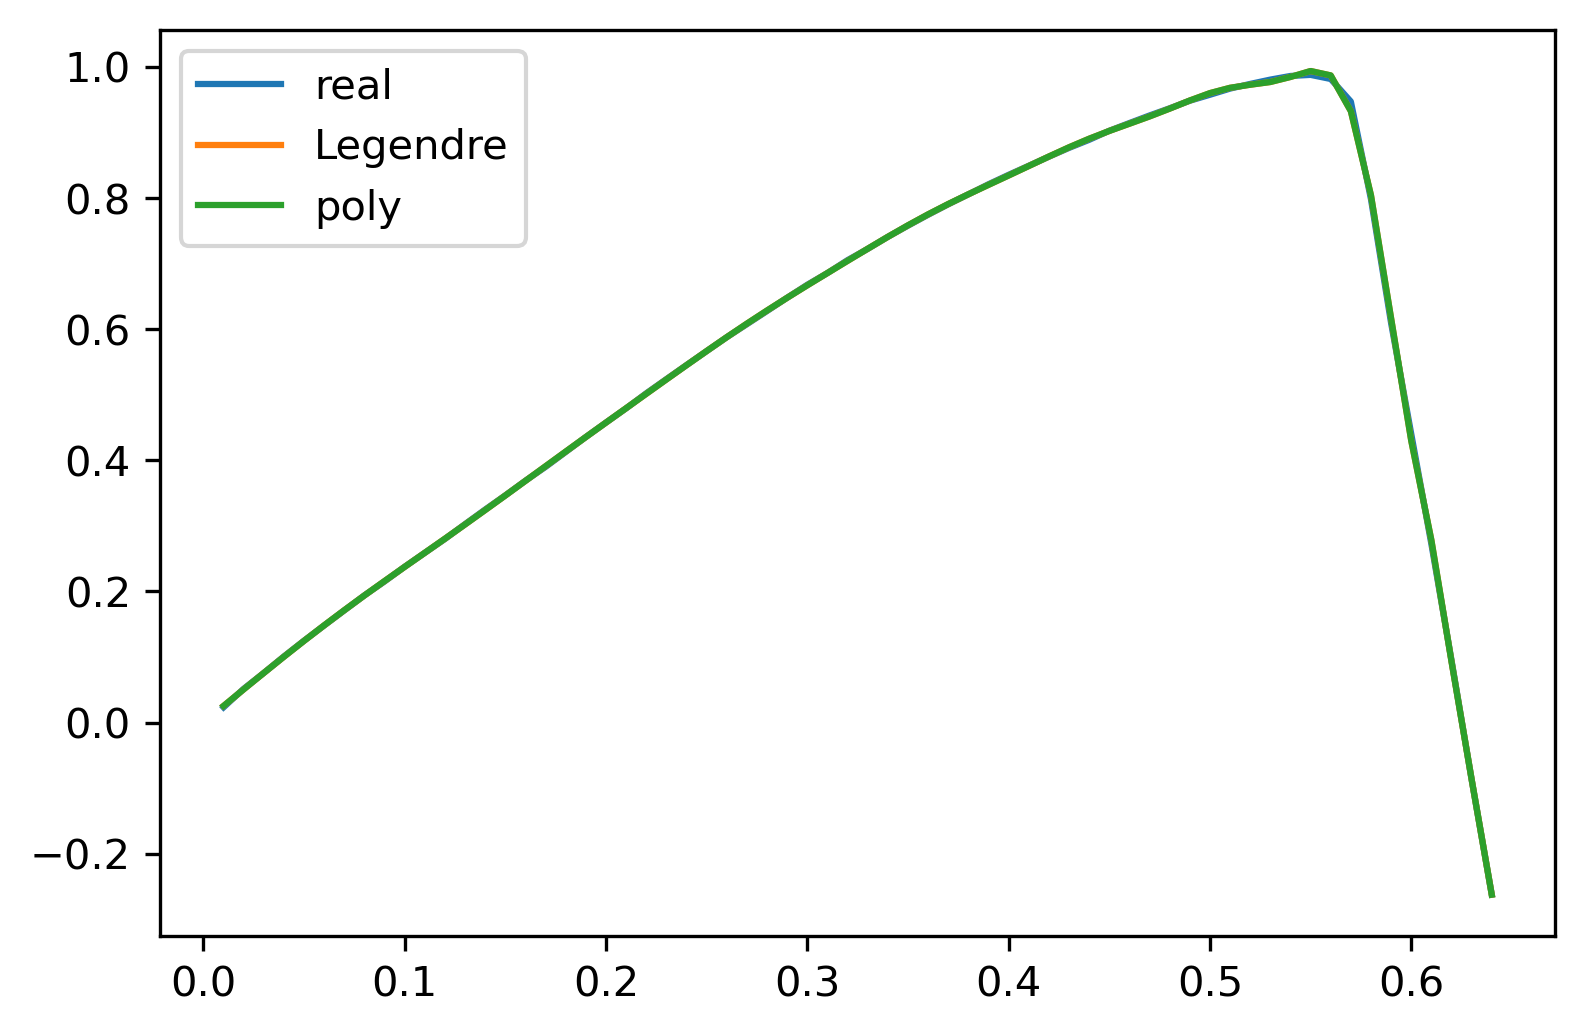

/usr/lib64/python3.6/site-packages/IPython/core/interactiveshell.py:3319: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


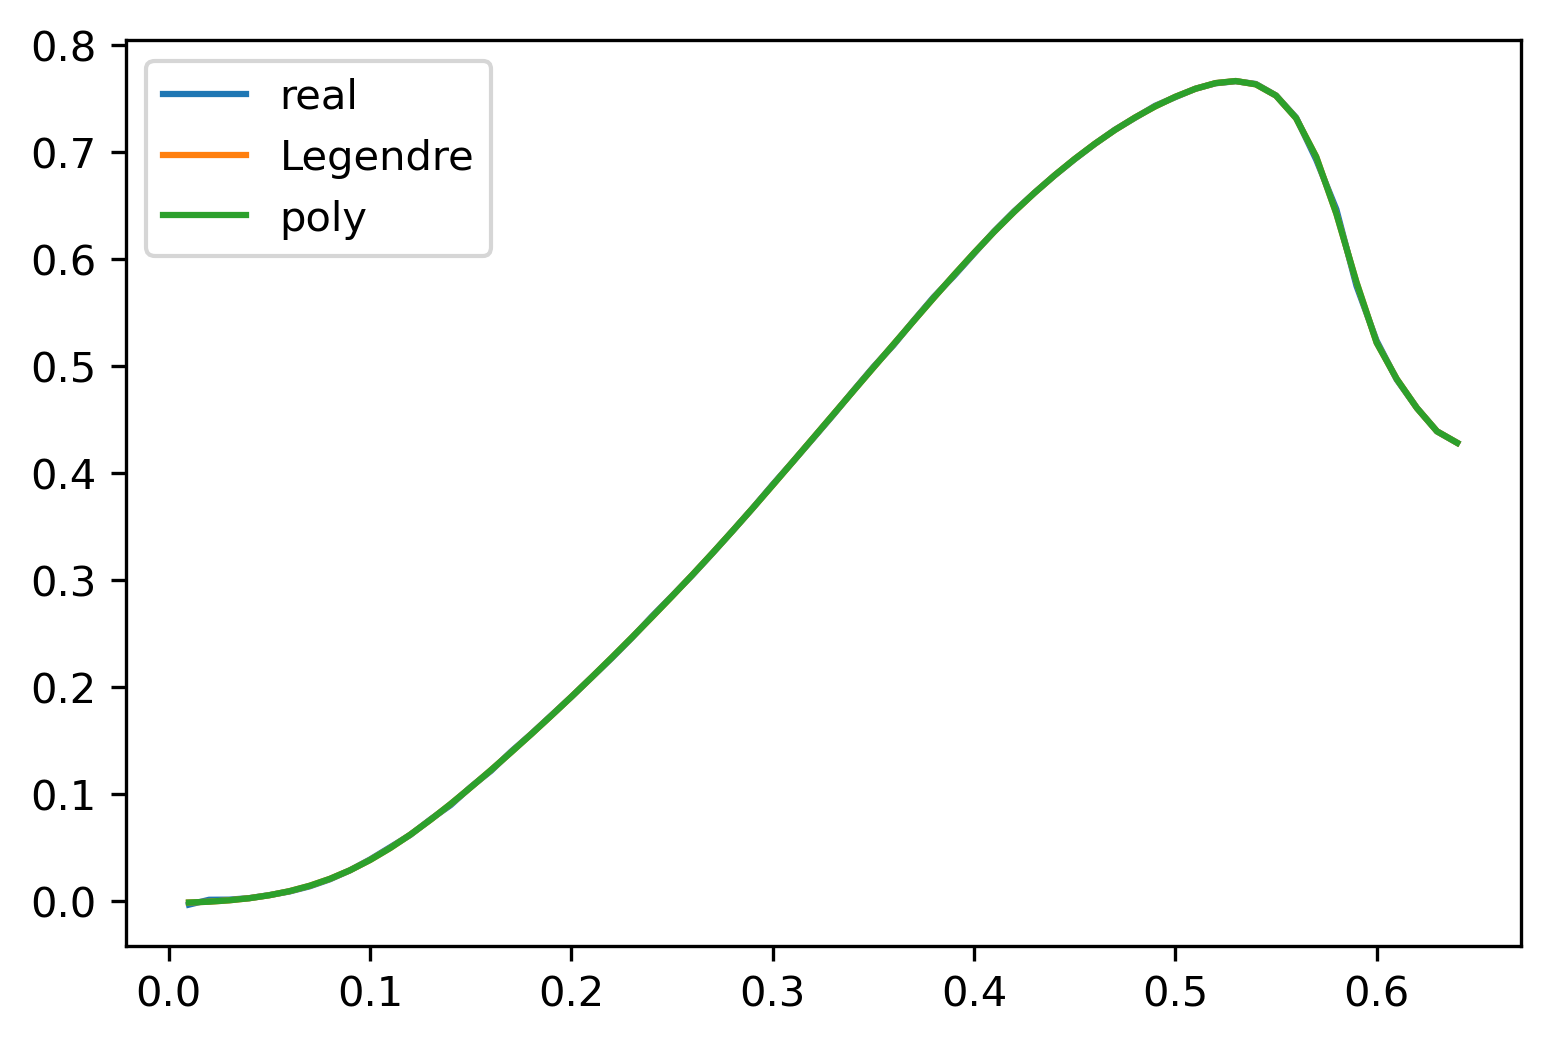

/usr/lib64/python3.6/site-packages/IPython/core/interactiveshell.py:3319: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


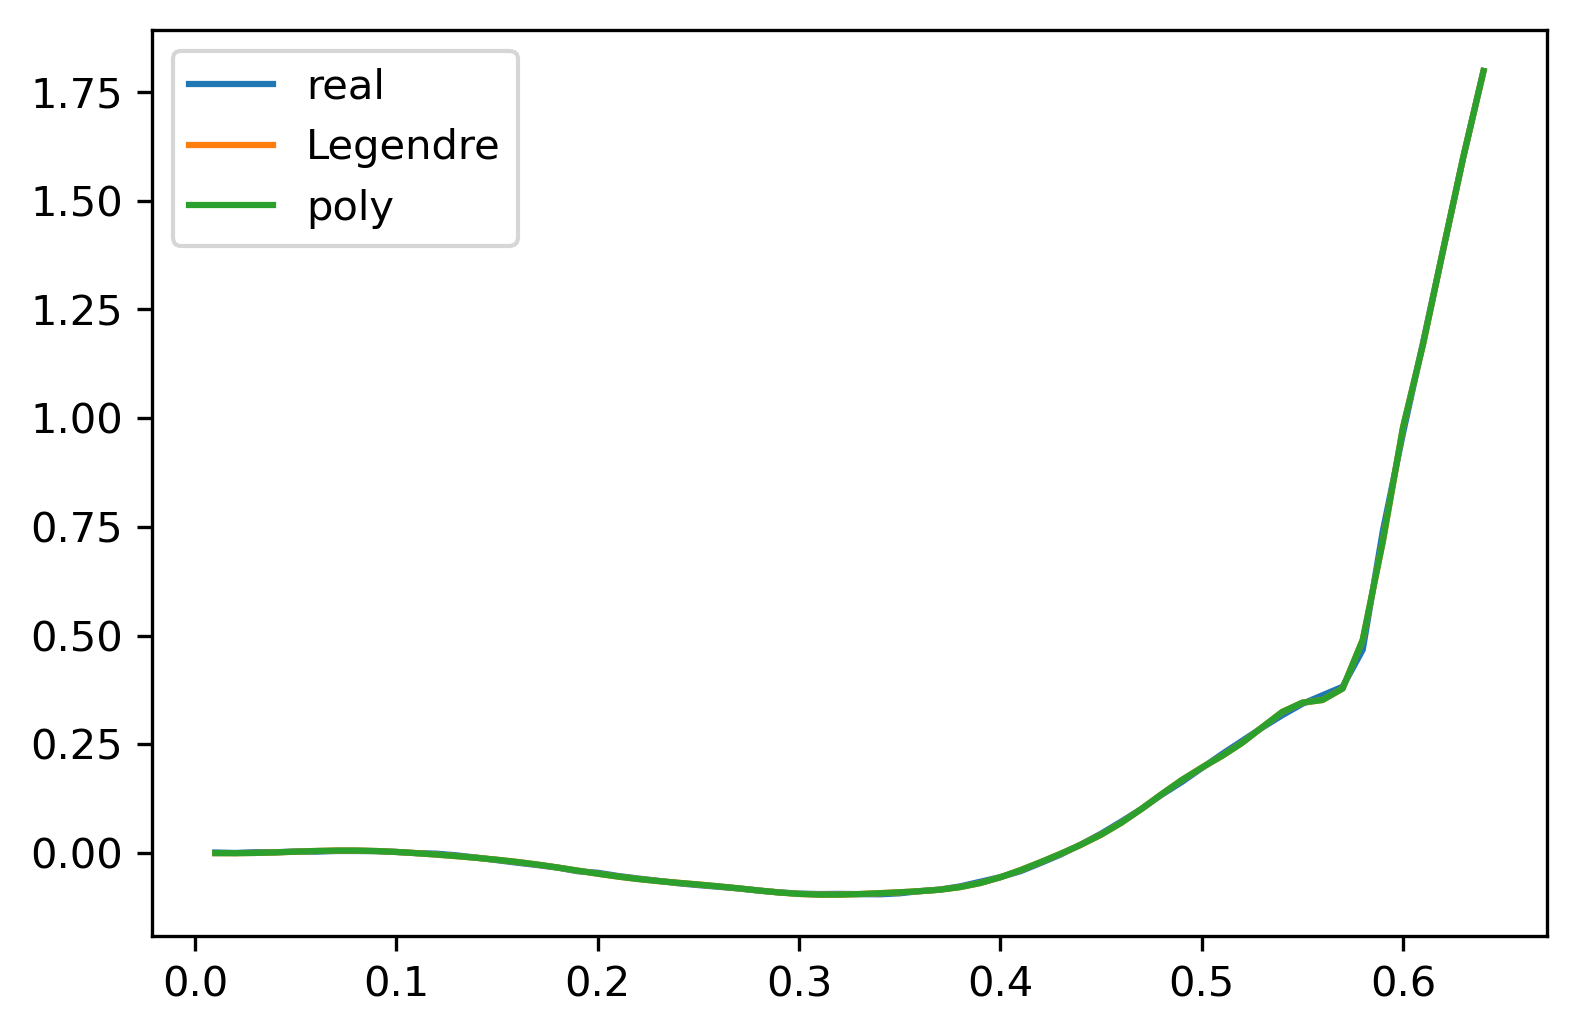

/usr/lib64/python3.6/site-packages/IPython/core/interactiveshell.py:3319: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


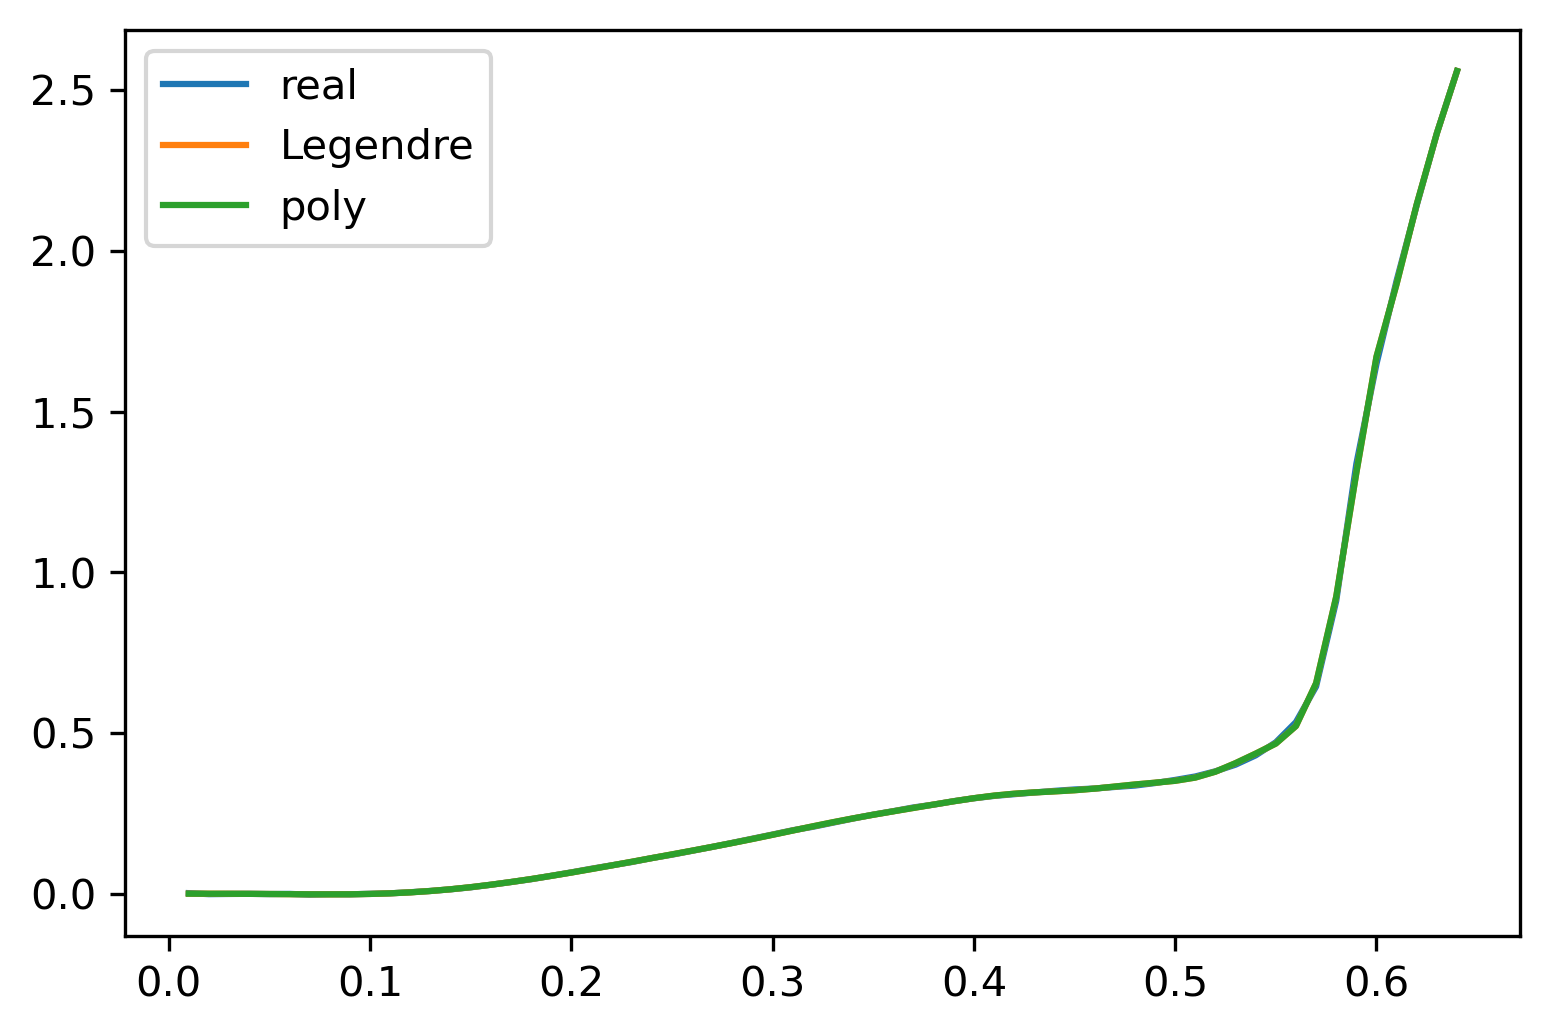

In [41]:
def LoadDataPE_TW(path, radius, order):
    data = []
    filename = path + 'file_' + radius + '.h5'
    h = tables.open_file(filename,'r')
    coeff = 'coeff' + str(order)
    hess = 'hess' + str(order)
    data = eval('np.array(h.root.'+ coeff + '[:])')
    h.close()
    return data

def main_photon(path, order):
    ra = np.arange(0.01, 0.65, 0.01)
    rd = []
    coeff_pe = []
    for radius in ra:
        str_radius = '%+.3f' % radius
        coeff= LoadDataPE_TW(path, str_radius, order)
        rd.append(np.array(radius))
        coeff_pe = np.hstack((coeff_pe, coeff)) 
    coeff_pe = np.reshape(coeff_pe,(-1,np.size(rd)),order='F')
    return rd, coeff_pe

order = 5
fit_order = 10
rd, coeff_pe = main_photon('coeff_pe_1t_shell_200000/',order)
rd = np.array(rd)
coeff_pe = np.array(coeff_pe)
#coeff_pe[1][55] = (coeff_pe[1][54] + coeff_pe[1][57])/2 + (coeff_pe[1][54] - coeff_pe[1][57])*1/3 
#coeff_pe[1][56] = (coeff_pe[1][54] + coeff_pe[1][57])/2 + (coeff_pe[1][54] - coeff_pe[1][57])*1/3 
coeff_pe[1][51:58] = np.interp(rd[51:58],np.array((rd[51], rd[57])), np.array((coeff_pe[1][51],coeff_pe[1][57])))
_fit_coeff = np.zeros((order, fit_order))

bd = 0.88
deg = 40
d = np.where(np.abs(rd-np.max(rd)*bd) == np.min(np.abs(rd-np.max(rd)*bd)))

for i in np.arange(order):

    if not i % 2:
        # Legendre coeff

        B, tmp = np.polynomial.legendre.legfit(np.hstack((rd/np.max(rd),-rd/np.max(rd))), \
                                                  np.hstack((coeff_pe[i+1], coeff_pe[i+1])), \
                                                  deg = deg, full = True)

        y1 = np.polynomial.legendre.legval(rd/np.max(rd), B)
        
        C = np.polyfit(np.hstack((rd/np.max(rd),-rd/np.max(rd))), \
                          np.hstack((coeff_pe[i+1], coeff_pe[i+1])), \
                          deg=deg)
        y2 = np.polyval(C, rd/np.max(rd))
    else:
        B, tmp = np.polynomial.legendre.legfit(np.hstack((rd/np.max(rd),-rd/np.max(rd))), \
                                                  np.hstack((coeff_pe[i+1], - coeff_pe[i+1])), \
                                                  deg = deg, full = True)

        y1 = np.polynomial.legendre.legval(rd/np.max(rd), B)
        
        C = np.polyfit(np.hstack((rd/np.max(rd),-rd/np.max(rd))), \
                          np.hstack((coeff_pe[i+1], -coeff_pe[i+1])), \
                          deg=deg)
        y2 = np.polyval(C, rd/np.max(rd))
    plt.figure(num = i+1, dpi = 300)
    plt.plot(rd, coeff_pe[i+1], label='real')
    plt.plot(rd, y1, label = 'Legendre')
    plt.plot(rd, y1, label = 'poly')
    plt.legend()
    plt.show()
#A = np.polynomial.legendre.Legendre.fit(np.array((-0.5,0.4)), np.array((0.5,0.6)),deg=5)

In [65]:
def LoadDataPE_TW(path, radius, order):
    data = []
    filename = path + 'file_' + radius + '.h5'
    h = tables.open_file(filename,'r')
    coeff = 'coeff' + str(order)
    AIC = 'AIC' + str(order)
    data = eval('np.array(h.root.'+ coeff + '[:])')
    AICdata = eval('np.array(h.root.'+ AIC + '[()])')
    h.close()
    return data, AICdata

def main_photon(path, order):
    ra = np.arange(0.01, 0.65, 0.01)
    rd = []
    coeff_pe = []
    aic = []
    for radius in ra:
        str_radius = '%+.3f' % radius
        coeff, AIC= LoadDataPE_TW(path, str_radius, order)
        rd.append(np.array(radius))
        coeff_pe = np.hstack((coeff_pe, coeff)) 
        aic= np.hstack((aic, AIC))
    coeff_pe = np.reshape(coeff_pe,(-1,np.size(rd)),order='F')
    return rd, coeff_pe, aic
AIC = []
for order in np.arange(2,30):
    rd, coeff_pe, aic= main_photon('coeff_pe_1t_8.0MeV_shell/',order)
    AIC.append(aic)
    '''
    plt.figure(dpi=300)
    for i in np.arange(order):
        plt.plot(rd, coeff_pe[i],'.',label='%d-th coefficient' % i)
    plt.legend()
    plt.xlabel('Radius/m')
    plt.ylabel('PE Legendre Coefficient')
    plt.savefig('Recon.png')
    plt.show()
    '''

In [81]:
print(np.argsort(np.array(AIC),axis=0))
print(np.argsort(np.array(AIC)[:,4]))
print(np.sort(np.array(AIC)[:,4]))
np.array(AIC)[:,4]

[[20  0  5 ... 27 27 27]
 [12  1  6 ... 26 26 26]
 [17  2  8 ... 25 25 25]
 ...
 [11 25 21 ...  2  2  2]
 [ 0 26 22 ...  1  1  1]
 [10 27  0 ...  0  0  0]]
[ 2  3  4  9 10  7 11  6  8  5 12 13 14 15 17 16 19 18 20 21 22 24 23 26
 25 27  1  0]
[9831424.47525861 9831424.74143961 9831425.08232632 9831425.31170338
 9831425.85110818 9831425.86535246 9831425.94613237 9831426.44286536
 9831426.96982935 9831427.03399065 9831427.8361465  9831429.40465627
 9831430.90152574 9831432.10310256 9831432.12659177 9831433.6765551
 9831433.88341654 9831433.90785301 9831435.58953645 9831437.30989051
 9831438.73748627 9831440.5352811  9831440.63066998 9831440.89932894
 9831441.29921787 9831442.7399342  9831462.59379445 9832339.6958648 ]


array([9832339.6958648 , 9831462.59379445, 9831424.47525861,
       9831424.74143961, 9831425.08232632, 9831427.03399065,
       9831426.44286536, 9831425.86535246, 9831426.96982935,
       9831425.31170338, 9831425.85110818, 9831425.94613237,
       9831427.8361465 , 9831429.40465627, 9831430.90152574,
       9831432.10310256, 9831433.6765551 , 9831432.12659177,
       9831433.90785301, 9831433.88341654, 9831435.58953645,
       9831437.30989051, 9831438.73748627, 9831440.63066998,
       9831440.5352811 , 9831441.29921787, 9831440.89932894,
       9831442.7399342 ])

In [82]:
A = np.argsort(np.array(AIC),axis=0)

In [85]:
A[0]

array([20,  0,  5,  2,  2,  4,  6, 10, 12, 22, 27,  8, 10, 11, 19, 26, 18,
       19, 17, 25, 26, 25, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27,
       26, 24, 27, 27, 27, 27, 27, 27, 25, 26, 27, 27, 27, 27, 25, 26, 21,
       27, 25, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27])